In [1]:
import pandas as pd

## Get measurements from CSV

In [2]:
sensor_readings = pd.read_csv("D:\Master\Thesis\Code\L-Town\measurements_LTown.csv", index_col = 0)

sensor_readings['Timestamp'] = pd.to_datetime(sensor_readings['Timestamp'])

# Extract entity ID and type
sensor_readings['entity_id'] = sensor_readings['sensor_id'].apply(lambda x: "_".join(x.split("_")[:2]))  # e.g., Node_1 or Pipe_12
sensor_readings['measurement_type'] = sensor_readings['sensor_type']  # demand, pressure, flow
sensor_readings['entity_type'] = sensor_readings['entity_id'].apply(lambda x: x.split("_")[0])  # Node or Pipe


In [3]:
sensor_readings["measurement_type"].unique()

array(['demand', 'flow', 'level', 'pressure'], dtype=object)

In [4]:
sensor_readings

,Timestamp,sensor_id,measurement,sensor_type,unique_id,entity_id,measurement_type,entity_type
0,2018-01-01 00:00:00,n1_demand,41.801667,demand,n1_demand_2018-01-01 00:00:00,n1_demand,demand,n1
1,2018-01-01 00:30:00,n1_demand,37.711667,demand,n1_demand_2018-01-01 00:30:00,n1_demand,demand,n1
2,2018-01-01 01:00:00,n1_demand,37.425000,demand,n1_demand_2018-01-01 01:00:00,n1_demand,demand,n1
3,2018-01-01 01:30:00,n1_demand,41.076667,demand,n1_demand_2018-01-01 01:30:00,n1_demand,demand,n1
4,2018-01-01 02:00:00,n1_demand,39.751667,demand,n1_demand_2018-01-01 02:00:00,n1_demand,demand,n1
...,...,...,...,...,...,...,...,...
5326075,2018-12-31 23:35:00,n769_pressure,48.330000,pressure,n769_pressure_2018-12-31 23:35:00,n769_pressure,pressure,n769
5326076,2018-12-31 23:40:00,n769_pressure,48.330000,pressure,n769_pressure_2018-12-31 23:40:00,n769_pressure,pressure,n769
5326077,2018-12-31 23:45:00,n769_pressure,48.360000,pressure,n769_pressure_2018-12-31 23:45:00,n769_pressure,pressure,n769
5326078,2018-12-31 23:50:00,n769_pressure,48.320000,pressure,n769_pressure_2018-12-31 23:50:00,n769_pressure,pressure,n769


In [5]:
# Nodes → demand
demands_df = sensor_readings[sensor_readings['measurement_type'] == 'demand']
demands_all = demands_df.pivot_table(index='Timestamp', columns=['entity_type'], values='measurement')

In [6]:
demands_all

entity_type,n1,n10,n11,n13,n16,n17,n18,n19,n2,n20,...,n40,n41,n42,n43,n44,n45,n6,n7,n8,n9
Timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,41.801667,42.246667,252.763333,169.983333,61.173333,268.900000,46.381667,95.145000,112.651667,106.310000,...,210.528333,89.528333,133.441667,74.175000,25.051667,217.703333,177.465000,255.903333,231.466667,262.408333
2018-01-01 00:30:00,37.711667,42.080000,272.173333,101.300000,40.010000,204.651667,42.625000,75.115000,83.136667,66.536667,...,151.203333,83.045000,123.778333,51.951667,18.488333,136.255000,135.065000,210.073333,126.196667,212.028333
2018-01-01 01:00:00,37.425000,23.261667,189.163333,91.825000,36.916667,196.053333,23.851667,51.430000,46.375000,56.936667,...,126.426667,54.695000,81.520000,48.276667,10.311667,116.596667,129.391667,165.678333,116.610000,133.613333
2018-01-01 01:30:00,41.076667,22.885000,189.800000,43.513333,34.856667,145.695000,28.040000,32.316667,51.645000,44.796667,...,57.490000,42.215000,62.923333,33.740000,11.483333,91.736667,96.156667,120.151667,115.490000,92.256667
2018-01-01 02:00:00,39.751667,14.896667,126.500000,53.878333,34.081667,90.496667,13.090000,17.340000,40.926667,41.073333,...,91.510000,48.531667,72.335000,23.166667,9.100000,84.108333,59.726667,54.741667,76.676667,99.265000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 21:30:00,214.273333,110.821667,514.861667,238.323333,87.590000,413.788333,62.458333,115.005000,130.740000,155.675000,...,294.626667,144.903333,215.978333,161.385000,29.076667,318.801667,273.091667,534.883333,394.745000,442.275000
2018-12-31 22:00:00,115.246667,105.376667,393.791667,217.011667,58.318333,468.473333,52.306667,97.768333,170.505000,108.668333,...,336.743333,111.061667,165.533333,93.121667,37.916667,222.533333,309.181667,431.168333,322.828333,519.708333
2018-12-31 22:30:00,100.130000,93.946667,463.678333,176.165000,115.300000,317.785000,57.188333,92.020000,215.485000,142.785000,...,350.755000,149.801667,223.280000,145.436667,47.916667,292.401667,209.728333,262.151667,309.735000,506.728333


### Separate data by feature

## Imputation

### Split train/val, and scale

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import joblib

def split_scale(measurements, feature, cluster):

    # Step 1: Split the full data (X_seq or X_ori) into train and validation sets
    X_train_full, X_val_full = train_test_split(measurements, test_size=0.2, shuffle = False, random_state=36)

    scaler = StandardScaler()

    # Fit and transform training data
    X_train_full_scaled = X_train_full.copy()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns, index=X_train_full.index)

    # Save scaler with specific name for later rescaling
    joblib.dump(scaler, f"{feature}_scaler_{cluster}.pkl")

    # Now, apply ONLY transformation (not fitting) on val data
    X_val_full_scaled = X_val_full.copy()
    X_val_full_scaled = scaler.transform(X_val_full)
    X_val_full_scaled = pd.DataFrame(X_val_full_scaled, columns=X_val_full.columns, index=X_val_full.index)

    return X_train_full_scaled, X_val_full_scaled, X_train_full, X_val_full

### Select semantically relevant pipes

Cluster 3: n18, n20, n21, n23, n24, n25, n26, n27, n28, n31, n33, n34, n343, n35, n356, n361, n364, n365, n366, n367, n369, n370, n372, n373, n377, n385, n387, n389, n39, n4, n43, n44  

Cluster 2: n30, n344, n351, n353, n358, n36, n381, n6, n7, n9  

Cluster 0: n1, n10, n16, n19, n2, n22, n29, n3, n32, n345, n346, n347, n349, n350, n352, n354, n357, n362, n368, n371, n374, n375, n376, n378, n379, n382, n383, n384, n41  

Cluster 1: n11, n13, n17, n355, n360, n386, n388, n40, n42, n45, n8

In [8]:
raw_nodes = "n30, n344, n351, n353, n358, n36, n381, n6, n7, n9"
quoted_nodes = [f"{node.strip()}" for node in raw_nodes.split(',')]

In [9]:
quoted_nodes

['n30', 'n344', 'n351', 'n353', 'n358', 'n36', 'n381', 'n6', 'n7', 'n9']

In [10]:
len(demands_all.columns)

82

In [11]:
demands_c0 = demands_all[['n1', 'n10', 'n16', 'n19', 'n2', 'n22', 'n29', 'n3', 'n32', 'n345', 'n346', 'n347', 'n349', 'n350', 'n352', 'n354', 'n357', 'n362', 'n368', 'n371', 'n374', 'n375', 'n376', 'n378', 'n379', 'n382', 'n383', 'n384', 'n41']]
demands_c1 = demands_all[["n11", "n13", "n17", "n355", "n360", "n386", "n388", "n40", "n42", "n45", "n8"]]
demands_c2 = demands_all[['n30', 'n344', 'n351', 'n353', 'n358', 'n36', 'n381', 'n6', 'n7', 'n9']]
demands_c3 = demands_all[["n18", "n20", "n21", "n23", "n24", "n25", "n26", "n27", "n28", "n31", "n33", "n34", "n343", "n35", "n356", "n361", "n364", "n365", "n366", "n367", "n369", "n370", "n372", "n373", "n377", "n385", "n387", "n389", "n39", "n4", "n43", "n44"]]
full_cluster = demands_all[:65]

# Initialize the containers
X_train_full_scaled = {}
X_val_full_scaled = {}
X_train_full_unscaled = {}
X_val_full_unscaled = {}
clusters = [demands_c0, demands_c1, demands_c2, demands_c3, full_cluster]

# Iterate over the clusters
for i, flow_cluster in enumerate(clusters):
    X_train_full_scaled[i], X_val_full_scaled[i], X_train_full_unscaled[i], X_val_full_unscaled[i] = split_scale(flow_cluster, "demand", i)


In [12]:
X_train_full_unscaled[1]

entity_type,n11,n13,n17,n355,n360,n386,n388,n40,n42,n45,n8
Timestamp,,,,,,,,,,,
2018-01-01 00:00:00,252.763333,169.983333,268.900000,144.061667,163.010000,178.736667,307.150000,210.528333,133.441667,217.703333,231.466667
2018-01-01 00:30:00,272.173333,101.300000,204.651667,233.173333,117.076667,115.551667,252.593333,151.203333,123.778333,136.255000,126.196667
2018-01-01 01:00:00,189.163333,91.825000,196.053333,182.311667,97.891667,79.065000,205.691667,126.426667,81.520000,116.596667,116.610000
2018-01-01 01:30:00,189.800000,43.513333,145.695000,106.415000,44.513333,107.911667,157.490000,57.490000,62.923333,91.736667,115.490000
2018-01-01 02:00:00,126.500000,53.878333,90.496667,76.330000,70.858333,92.508333,108.628333,91.510000,72.335000,84.108333,76.676667
...,...,...,...,...,...,...,...,...,...,...,...
2018-10-19 21:30:00,567.195000,266.296667,430.823333,515.263333,244.650000,288.431667,443.606667,315.965000,347.305000,186.545000,138.800000
2018-10-19 22:00:00,475.620000,211.653333,432.701667,401.605000,242.830000,307.023333,471.475000,313.611667,260.241667,177.061667,223.646667
2018-10-19 22:30:00,391.000000,170.551667,308.111667,219.138333,248.690000,263.465000,394.298333,321.186667,179.930000,183.028333,252.631667


### Introduce MCAR Missingness

In [13]:
from pygrinder import mar_logistic

missing_rates = [0.05, 0.2, 0.6, 0.90]

# Training and validation sets for each cluster
X_train_incomplete = {}
X_val_incomplete = {}
train_masks = {}
val_masks = {}
X_train_seq = {}
X_val_seq = {}
train_masks_seq = {}
val_masks_seq = {}


for cluster_id, flow_cluster in enumerate(clusters):
    X_train_incomplete[cluster_id] = {}
    X_val_incomplete[cluster_id] = {}
    train_masks[cluster_id] = {}
    val_masks[cluster_id] = {}
    X_train_seq[cluster_id] = {}
    X_val_seq[cluster_id] = {}
    train_masks_seq[cluster_id] = {}
    val_masks_seq[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)

        # Introduce missingness per cluster & rate
        print(f"Introducing {rate*100}% missingness for cluster {cluster_id} with key {key}")
        X_train_incomplete[cluster_id][key] = mar_logistic(X_train_full_scaled[cluster_id].values, obs_rate = 0.4, missing_rate=rate)
        X_val_incomplete[cluster_id][key] = mar_logistic(X_val_full_scaled[cluster_id].values, obs_rate = 0.4, missing_rate=rate)

        # Masks for missingness
        train_masks[cluster_id][key] = np.isnan(X_train_incomplete[cluster_id][key])
        val_masks[cluster_id][key] = np.isnan(X_val_incomplete[cluster_id][key])

Introducing 5.0% missingness for cluster 0 with key 5
Introducing 20.0% missingness for cluster 0 with key 20
Introducing 60.0% missingness for cluster 0 with key 60
Introducing 90.0% missingness for cluster 0 with key 90
Introducing 5.0% missingness for cluster 1 with key 5
Introducing 20.0% missingness for cluster 1 with key 20
Introducing 60.0% missingness for cluster 1 with key 60
Introducing 90.0% missingness for cluster 1 with key 90
Introducing 5.0% missingness for cluster 2 with key 5
Introducing 20.0% missingness for cluster 2 with key 20
Introducing 60.0% missingness for cluster 2 with key 60
Introducing 90.0% missingness for cluster 2 with key 90
Introducing 5.0% missingness for cluster 3 with key 5
Introducing 20.0% missingness for cluster 3 with key 20
Introducing 60.0% missingness for cluster 3 with key 60
Introducing 90.0% missingness for cluster 3 with key 90
Introducing 5.0% missingness for cluster 4 with key 5
Introducing 20.0% missingness for cluster 4 with key 20
In

### Mean Imputation

In [14]:
def mean_impute(X_incomplete):
    """
    Impute missing values using feature-wise mean over the entire dataset.
    Assumes input shape is [n_samples, n_steps, n_features].
    """
    X_imputed = X_incomplete.copy()
    n_features = X_imputed.shape[1]

    for f in range(n_features):
        feature_data = X_imputed[:, f]
        mean_val = np.nanmean(feature_data)
        feature_data[np.isnan(feature_data)] = mean_val
        X_imputed[:, f] = feature_data

    return X_imputed


In [15]:
# Dictionary to hold results
mean_imputed_results = {}
missing_masks = {}

for cluster_id in range(len(clusters)):
    mean_imputed_results[cluster_id] = {}
    missing_masks[cluster_id] = {}
    
    for rate in missing_rates:
        key = int(rate * 100)
        X_missing = X_val_incomplete[cluster_id][key]
        
        # Impute using mean
        X_imputed = mean_impute(X_missing)
        mean_imputed_results[cluster_id][key] = X_imputed

C:\Users\Pepe\AppData\Local\Temp\ipykernel_8024\1295300723.py:11: RuntimeWarning: Mean of empty slice
  mean_val = np.nanmean(feature_data)


In [16]:
import joblib

imputed_unscaled_mean = {}

for cluster_id in range(len(clusters)):
    imputed_unscaled_mean[cluster_id] = {}
    
    scaler = joblib.load(f"demand_scaler_{cluster_id}.pkl")
    
# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        
        imputed_unscaled_mean[cluster_id][key] = scaler.inverse_transform(mean_imputed_results[cluster_id][key])

In [17]:
# Calculate MAE for imputation evaluation

mae_mean = {}
for cluster_id in range(len(clusters)):
    mae_mean[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)
        mae_mean[cluster_id][key] = np.mean(np.abs(imputed_unscaled_mean[cluster_id][key][val_masks[cluster_id][key]] - X_val_full_unscaled[cluster_id].values[val_masks[cluster_id][key]]))
        print(f"MAE Cluster {cluster_id} Rate {rate*100}% (MAE): {mae_mean[cluster_id][key]}")

MAE Cluster 0 Rate 5.0% (MAE): 69.44404224386464
MAE Cluster 0 Rate 20.0% (MAE): 45.969190805123226
MAE Cluster 0 Rate 60.0% (MAE): 84.42087017008248
MAE Cluster 0 Rate 90.0% (MAE): 80.59367846144146
MAE Cluster 1 Rate 5.0% (MAE): 138.08449492206594
MAE Cluster 1 Rate 20.0% (MAE): 143.1188112172565
MAE Cluster 1 Rate 60.0% (MAE): 153.8463241108802
MAE Cluster 1 Rate 90.0% (MAE): 125.77193310815305
MAE Cluster 2 Rate 5.0% (MAE): 143.5572716888418
MAE Cluster 2 Rate 20.0% (MAE): 124.41082512725484
MAE Cluster 2 Rate 60.0% (MAE): 136.14730750891377
MAE Cluster 2 Rate 90.0% (MAE): 178.14912391040608
MAE Cluster 3 Rate 5.0% (MAE): 207.0074553875323
MAE Cluster 3 Rate 20.0% (MAE): 107.79247605040801
MAE Cluster 3 Rate 60.0% (MAE): 45.52681180075994
MAE Cluster 3 Rate 90.0% (MAE): 199.56761291477864
MAE Cluster 4 Rate 5.0% (MAE): 65.43014377541012
MAE Cluster 4 Rate 20.0% (MAE): 116.14322643253337
MAE Cluster 4 Rate 60.0% (MAE): 133.78888806937312
MAE Cluster 4 Rate 90.0% (MAE): nan


In [18]:
#SMAPE for each percentage of missingness
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        numerator = np.abs((imputed_unscaled_mean[cluster_id][key][val_masks[cluster_id][key]] - X_val_full_unscaled[cluster_id].values[val_masks[cluster_id][key]]))
        denominator = np.abs(imputed_unscaled_mean[cluster_id][key][val_masks[cluster_id][key]]) + np.abs(X_val_full_unscaled[cluster_id].values[val_masks[cluster_id][key]]) + 1e-8
        smape[cluster_id][key] = 100 * np.mean(2 * numerator / denominator)
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")

SMAPE Cluster 0 Rate 5.0%: 53.31%
SMAPE Cluster 0 Rate 20.0%: 51.75%
SMAPE Cluster 0 Rate 60.0%: 59.82%
SMAPE Cluster 0 Rate 90.0%: 56.57%
SMAPE Cluster 1 Rate 5.0%: 52.97%
SMAPE Cluster 1 Rate 20.0%: 47.99%
SMAPE Cluster 1 Rate 60.0%: 50.98%
SMAPE Cluster 1 Rate 90.0%: 53.78%
SMAPE Cluster 2 Rate 5.0%: 62.12%
SMAPE Cluster 2 Rate 20.0%: 44.19%
SMAPE Cluster 2 Rate 60.0%: 52.33%
SMAPE Cluster 2 Rate 90.0%: 60.06%
SMAPE Cluster 3 Rate 5.0%: 49.85%
SMAPE Cluster 3 Rate 20.0%: 47.34%
SMAPE Cluster 3 Rate 60.0%: 46.59%
SMAPE Cluster 3 Rate 90.0%: 55.99%
SMAPE Cluster 4 Rate 5.0%: 85.77%
SMAPE Cluster 4 Rate 20.0%: 90.42%
SMAPE Cluster 4 Rate 60.0%: 87.20%
SMAPE Cluster 4 Rate 90.0%: nan%


### MICE Imputation

In [19]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=36)

# Fit on train with missing values
imputer.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

# Transform test data with missing values
IterativeImputer(random_state=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
imputed = imputer.transform(X_test)

# the model learns that the second feature is double the first
print(np.round(imputer.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [20]:
X_test

[[nan, 2], [6, nan], [nan, 6]]

In [21]:
missing_rates

[0.05, 0.2, 0.6, 0.9]

In [22]:
# Dictionary to hold results
mice_imputed_results = {}

for cluster_id in range(len(clusters)):
    mice_imputed_results[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)
        print(f"Rate {key} for cluster {cluster_id}")
        imputer = IterativeImputer(max_iter=10, random_state=0, verbose = 1)

        # Fit on training data with missing values
        imputer.fit(X_train_incomplete[cluster_id][key])
        
        # Impute using mice
        X_imputed = imputer.transform(X_val_incomplete[cluster_id][key])
        mice_imputed_results[cluster_id][key] = X_imputed

Rate 5 for cluster 0
[IterativeImputer] Completing matrix with shape (14016, 29)
[IterativeImputer] Change: 8.316972732543945, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 0.5283327102661133, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 0.12845945358276367, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 2.847543716430664, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 2.694247245788574, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 1.8433291912078857, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 8.380021095275879, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 23.6720027923584, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 29.466819763183594, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 15.849039077758789, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Completing matrix with shape (3504,

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 16.292375564575195, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 1.246692180633545, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 0.23740673065185547, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 0.16731083393096924, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 0.15319716930389404, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 0.1296224594116211, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 0.4313102960586548, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 5.183964252471924, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 20.69629669189453, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 160.57186889648438, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Completing matrix with shape (3504, 29)
Rate 60 for cluster 0
[IterativeImputer] Completing matrix with shape (

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 27.238508224487305, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 5.869651794433594, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 10.217443466186523, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 26.829551696777344, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 17.921062469482422, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 14.506660461425781, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 200.0491943359375, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 14.670425415039062, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 217.68292236328125, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 57.62727737426758, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Completing matrix with shape (3504, 29)
Rate 90 for cluster 0
[IterativeImputer] Completing matrix with shape (140

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 22.591367721557617, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 25.13498878479004, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 27.781328201293945, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 28.329023361206055, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 23.313495635986328, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 24.52948570251465, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 44.32854461669922, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 36.5477180480957, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 31.919939041137695, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Change: 63.28205490112305, scaled tolerance: 0.005536511421203614 
[IterativeImputer] Completing matrix with shape (3504, 29)
Rate 5 for cluster 1
[IterativeImputer] Completing matrix with shape (14016, 

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 0.0007367432117462158, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (3504, 11)
Rate 20 for cluster 1
[IterativeImputer] Completing matrix with shape (14016, 11)
[IterativeImputer] Change: 7.466121196746826, scaled tolerance: 0.0034515693187713624 
[IterativeImputer] Change: 1.01924729347229, scaled tolerance: 0.0034515693187713624 
[IterativeImputer] Change: 0.24909961223602295, scaled tolerance: 0.0034515693187713624 
[IterativeImputer] Change: 0.06672263145446777, scaled tolerance: 0.0034515693187713624 
[IterativeImputer] Change: 0.017867207527160645, scaled tolerance: 0.0034515693187713624 
[IterativeImputer] Change: 0.004792928695678711, scaled tolerance: 0.0034515693187713624 
[IterativeImputer] Change: 0.0012799501419067383, scaled tolerance: 0.0034515693187713624 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 4.131760120391846, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Change: 2.115990161895752, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Change: 2.095518112182617, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Change: 0.9727045297622681, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Change: 2.4769184589385986, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Change: 2.8442134857177734, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Change: 2.461987018585205, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Change: 2.279207229614258, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Change: 1.3691754341125488, scaled tolerance: 0.003448535442352295 
[IterativeImputer] Completing matrix with shape (3504, 11)
Rate 5 for cluster 2
[IterativeImputer] Completing matrix with shape (14016, 10)
[IterativeImputer] Change: 4.462307929992676, scaled tolerance: 0.0034373376369476

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 0.39700794219970703, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.15805011987686157, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.06593698263168335, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.027604401111602783, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.011557161808013916, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.0048427581787109375, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.002027273178100586, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (3504, 10)
Rate 60 for cluster 2
[IterativeImputer] Completing matrix with shape (14016, 10)
[IterativeImputer] Change: 10.848382949829102, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 3.405888557434082, scaled tolerance: 0.0034373376369476317 
[It

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Completing matrix with shape (3504, 10)
Rate 90 for cluster 2
[IterativeImputer] Completing matrix with shape (14016, 10)
[IterativeImputer] Change: 10.5753173828125, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 3.838730812072754, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 3.0576767921447754, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.6031649112701416, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.41133594512939453, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.3078724145889282, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.25237250328063965, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.21462810039520264, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.18690550327301025, scaled tolerance: 0.0034373376369476317 
[IterativeImputer] Change: 0.1656409502029419, scaled tolerance: 0

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 10.244632720947266, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 0.682170033454895, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 0.3332117795944214, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 0.2558271884918213, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 19.297395706176758, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 25.81998062133789, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 14.922510147094727, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 4.996911525726318, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 0.7758869528770447, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 6.928586959838867, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Completing matrix with shape (3504, 32)
Rate 20 for cluster 3
[IterativeImputer] Completing matrix with shape (1401

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 17.43035888671875, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 1.6584304571151733, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 0.48334357142448425, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 0.07387427985668182, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 0.6223652362823486, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 6.7313642501831055, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 10.523441314697266, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 13.819599151611328, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 0.8103452920913696, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Change: 1.3620421886444092, scaled tolerance: 0.007938280582427978 
[IterativeImputer] Completing matrix with shape (3504, 32)
Rate 60 for cluster 3
[IterativeImputer] Completing matrix with shape 

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 25.50485610961914, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 5.589170455932617, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 7.584375381469727, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 1.980602502822876, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 8.15357494354248, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 10.967352867126465, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 17.085241317749023, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 39.755836486816406, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 55.09229278564453, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Change: 33.93470001220703, scaled tolerance: 0.007851129531860351 
[IterativeImputer] Completing matrix with shape (3504, 32)
Rate 90 for cluster 3
[IterativeImputer] Completing matrix with shape (14016, 3

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 18.423095703125, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 0.08603620529174805, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 38.234928131103516, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 608.5635375976562, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 650.0068969726562, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 92.35369873046875, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 92.42620849609375, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 697.6278076171875, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 684.1795654296875, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Change: 5407.1611328125, scaled tolerance: 0.007626693725585938 
[IterativeImputer] Completing matrix with shape (3504, 32)
Rate 5 for cluster 4
[IterativeImputer] Completing matrix with shape (52, 82)


d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 11.43641471862793, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 1.0570087432861328, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.45237812399864197, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.47555750608444214, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.6931841969490051, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.59562087059021, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.30387574434280396, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.26487845182418823, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.5538845062255859, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.5867285132408142, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Completing matrix with shape (13, 82)
Rate 20 for cluster 4
[IterativeImputer] Completing matrix with shape (5

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 25.945140838623047, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 3.704010009765625, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 1.6440339088439941, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.6765441298484802, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.27722299098968506, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.142680361866951, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.07070291042327881, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.04550135135650635, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.029276609420776367, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.12394486367702484, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Completing matrix with shape (13, 82)
Rate 60 for cluster 4
[IterativeImputer] Completing matrix with shape

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 51.21318054199219, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 7.309798240661621, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 6.4633469581604, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 4.697670936584473, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 2.765697479248047, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 3.0571084022521973, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 2.001687526702881, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 1.5625245571136475, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 1.3066900968551636, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Change: 1.4976389408111572, scaled tolerance: 0.0032625961303710937 
[IterativeImputer] Completing matrix with shape (13, 82)
Rate 90 for cluster 4
[IterativeImputer] Completing matrix with shape (

d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[IterativeImputer] Change: 5.301389217376709, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 1.264818787574768, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.25766193866729736, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.09442757070064545, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.03720963001251221, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.015144944190979004, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.006416738033294678, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Change: 0.002796173095703125, scaled tolerance: 0.004543147087097168 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (13, 82)


In [23]:
mice_imputed_results[0][20]

array([[-0.5601144 , -0.6503718 , -0.833753  , ..., -0.66097677,
        -0.6393503 , -0.50994533],
       [-0.56060666, -1.0054954 , -0.6947575 , ..., -0.9558981 ,
        -0.8522482 , -0.8635773 ],
       [-0.5618067 , -0.9587519 , -1.2015084 , ..., -0.706963  ,
        -1.0049225 , -0.9066047 ],
       ...,
       [-0.49296066,  0.19156624,  0.6709973 , ..., -0.06936998,
        -0.04527993, -0.09033658],
       [-0.5053395 , -0.1562099 , -0.9250547 , ..., -0.4955546 ,
        -0.04510139, -0.03711906],
       [-0.4371384 , -0.91022134, -0.95863044, ..., -0.8737483 ,
        -0.6362361 , -0.47652516]], dtype=float32)

### Unscale data before evaluation

In [24]:
import joblib

mice_imputed_unscaled = {}

for cluster_id in range(len(clusters)):
    mice_imputed_unscaled[cluster_id] = {}
    
    scaler = joblib.load(f"demand_scaler_{cluster_id}.pkl")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        mice_imputed_unscaled[cluster_id][key] = scaler.inverse_transform(mice_imputed_results[cluster_id][key])

## Evaluation

In [25]:
def clip_imputed_values(imputed_dict, min_val, max_val):
    clipped_dict = {}
    for cluster_id in imputed_dict:
        clipped_dict[cluster_id] = {}
        for rate_key in imputed_dict[cluster_id]:
            imputed_array = imputed_dict[cluster_id][rate_key]
            clipped_array = np.clip(imputed_array, min_val, max_val)
            clipped_dict[cluster_id][rate_key] = clipped_array
    return clipped_dict

imputed_clipped = clip_imputed_values(mice_imputed_unscaled, min_val=0, max_val=200)

In [26]:
import numpy as np
from sklearn.metrics import r2_score

r2_scores = {}

for cluster_id in range(len(clusters)):
    r2_scores[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)

        imputed = mice_imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled[cluster_id]
        mask = val_masks[cluster_id][key]

        # Initialize list for per-feature R²
        feature_r2 = []

        for f in range(original.values.shape[1]):  # loop over features
            f_mask = mask[:, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            y_true = original.values[:, f][f_mask]
            y_pred = imputed[:, f][f_mask]

            if len(y_true) < 2:
                continue  # not enough points to compute R²

            r2 = r2_score(y_true, y_pred)
            feature_r2.append(r2)

        if feature_r2:
            r2_scores[cluster_id][key] = np.mean(feature_r2)
        else:
            r2_scores[cluster_id][key] = np.nan  # or 0 or another fallback

        print(f"R² Cluster {cluster_id} Rate {rate*100:.0f}%: {r2_scores[cluster_id][key]:.3f}")


R² Cluster 0 Rate 5%: 0.708
R² Cluster 0 Rate 20%: -1574068488.707
R² Cluster 0 Rate 60%: -9.098
R² Cluster 0 Rate 90%: -6858239270164343947515329284159832064.000
R² Cluster 1 Rate 5%: 0.695
R² Cluster 1 Rate 20%: 0.710
R² Cluster 1 Rate 60%: 0.426
R² Cluster 1 Rate 90%: -63991081.912
R² Cluster 2 Rate 5%: 0.740
R² Cluster 2 Rate 20%: 0.603
R² Cluster 2 Rate 60%: 0.530
R² Cluster 2 Rate 90%: 0.558
R² Cluster 3 Rate 5%: 0.625
R² Cluster 3 Rate 20%: 0.676
R² Cluster 3 Rate 60%: -52801.930
R² Cluster 3 Rate 90%: -182323.310
R² Cluster 4 Rate 5%: 0.811
R² Cluster 4 Rate 20%: -25.596
R² Cluster 4 Rate 60%: -0.662
R² Cluster 4 Rate 90%: -3.637


In [27]:
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed = mice_imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled[cluster_id].values
        mask = val_masks[cluster_id][key]

        # Initialize per-feature smape list
        feature_smapes = []
        for f in range(original.shape[1]):
            f_mask = mask[:, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            F = imputed[:, f][f_mask]
            A = original[:, f][f_mask]

            num = np.abs(F - A)
            denom = np.abs(F) + np.abs(A) + 1e-8
            smape_f = np.mean(2 * num / denom) * 100
            feature_smapes.append(smape_f)

        smape[cluster_id][key] = np.mean(feature_smapes)
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")


SMAPE Cluster 0 Rate 5.0%: 20.52%
SMAPE Cluster 0 Rate 20.0%: 32.56%
SMAPE Cluster 0 Rate 60.0%: 44.87%
SMAPE Cluster 0 Rate 90.0%: 199.88%
SMAPE Cluster 1 Rate 5.0%: 15.15%
SMAPE Cluster 1 Rate 20.0%: 14.20%
SMAPE Cluster 1 Rate 60.0%: 27.67%
SMAPE Cluster 1 Rate 90.0%: 174.07%
SMAPE Cluster 2 Rate 5.0%: 18.09%
SMAPE Cluster 2 Rate 20.0%: 16.61%
SMAPE Cluster 2 Rate 60.0%: 24.30%
SMAPE Cluster 2 Rate 90.0%: 35.41%
SMAPE Cluster 3 Rate 5.0%: 22.63%
SMAPE Cluster 3 Rate 20.0%: 18.08%
SMAPE Cluster 3 Rate 60.0%: 50.89%
SMAPE Cluster 3 Rate 90.0%: 51.41%
SMAPE Cluster 4 Rate 5.0%: 10.86%
SMAPE Cluster 4 Rate 20.0%: 19.06%
SMAPE Cluster 4 Rate 60.0%: 51.39%
SMAPE Cluster 4 Rate 90.0%: 81.46%


### Average errors per cluster

In [28]:
features_per_cluster = {i: X_val_full_unscaled[i].shape[-1] for i in range(len(clusters))}

In [29]:
features_per_cluster

{0: 29, 1: 11, 2: 10, 3: 32, 4: 82}

In [36]:
n_clusters = len(clusters) - 1  # number of actual clusters
flow_all_id = len(clusters) - 1  # index of the full dataset

avg_r2_cluster = {}
r2_all = {}

for rate in missing_rates:
    key = int(rate * 100)

    # Gather RMSE and weights
    r2_values = np.array([r2_scores[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])

    weighted_avg = np.average(r2_values, weights=feature_counts)

    avg_r2_cluster[key] = weighted_avg
    r2_all[key] = r2_scores[flow_all_id][key]

    print(f"Weighted Average R2 for rate {rate*100}%: {avg_r2_cluster[key]:.2f}%")
    print(f"R2 for full at rate {rate*100}%: {r2_all[key]:.2f}%")

Weighted Average R2 for rate 5.0%: 0.68%
R2 for full at rate 5.0%: 0.81%
Weighted Average R2 for rate 20.0%: -556682757.77%
R2 for full at rate 20.0%: -25.60%
Weighted Average R2 for rate 60.0%: -20608.73%
R2 for full at rate 60.0%: -0.66%
Weighted Average R2 for rate 90.0%: -2425474863838609538436464437851324416.00%
R2 for full at rate 90.0%: -3.64%


In [31]:
avg_smape_cluster = {}
smape_all = {}

for rate in missing_rates:
    key = int(rate * 100)
    
    # Gather SMAPE and weights (number of features per cluster)
    smape_values = np.array([smape[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])
    
    # Compute weighted average
    weighted_avg = np.average(smape_values, weights=feature_counts)
    
    avg_smape_cluster[key] = weighted_avg
    smape_all[key] = smape[flow_all_id][key]  # for full feature set
    
    print(f"Weighted Average SMAPE for rate {rate*100}%: {avg_smape_cluster[key]:.2f}%")
    print(f"SMAPE for full at rate {rate*100}%: {smape_all[key]:.2f}%")


Weighted Average SMAPE for rate 5.0%: 20.33%
SMAPE for full at rate 5.0%: 10.86%
Weighted Average SMAPE for rate 20.0%: 22.50%
SMAPE for full at rate 20.0%: 19.06%
Weighted Average SMAPE for rate 60.0%: 42.40%
SMAPE for full at rate 60.0%: 51.39%
Weighted Average SMAPE for rate 90.0%: 118.42%
SMAPE for full at rate 90.0%: 81.46%


SMAPE: 8.45%
SMAPE: 10.32%
SMAPE: 12.04%
SMAPE: 30.44%

In [32]:
smape.values()

dict_values([{5: 20.52476733231459, 20: 32.556363690473034, 60: 44.87346377918432, 90: 199.87802074680658}, {5: 15.149217300518456, 20: 14.196895022902662, 60: 27.667262352559327, 90: 174.0697679006705}, {5: 18.089195670285353, 20: 16.605097226038428, 60: 24.295049549943183, 90: 35.41414431363653}, {5: 22.63115344372461, 20: 18.080156241827076, 60: 50.892833346955285, 90: 51.40914547261927}, {5: 10.8600803521438, 20: 19.05529818265187, 60: 51.39191618806902, 90: 81.4583922237815}])

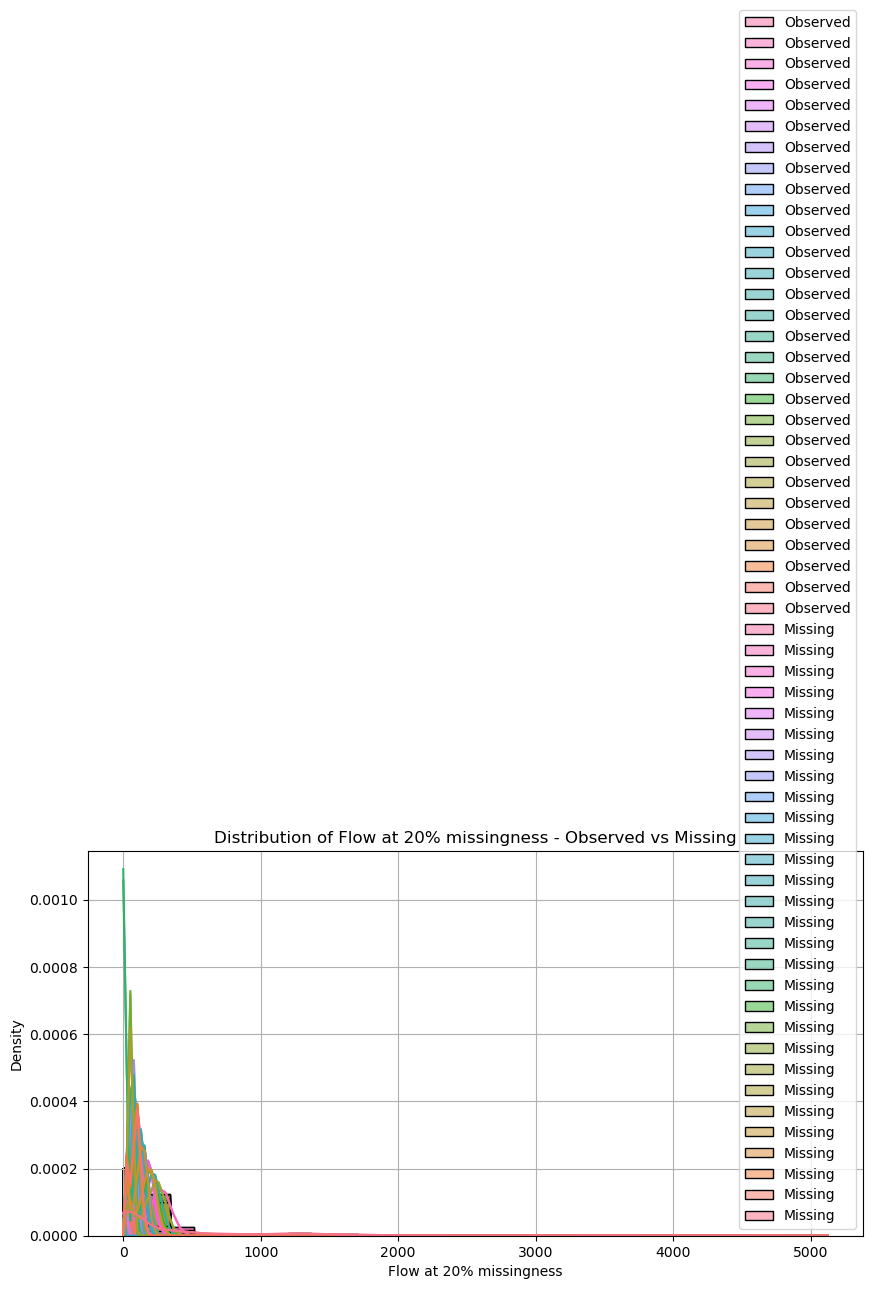

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_missing_vs_observed(data, mask, feature_name="flow"):
    """
    data: 1D array of original values
    mask: 1D boolean array, True if missing
    feature_name: for labeling
    """
    data_missing = data[mask]
    data_observed = data[~mask]

    plt.figure(figsize=(10, 5))
    sns.histplot(data_observed, color='blue', label='Observed', kde=True, stat="density", bins=30)
    sns.histplot(data_missing, color='red', label='Missing', kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {feature_name} - Observed vs Missing")
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_missing_vs_observed(X_val_full_unscaled[0], val_masks[0][90], feature_name="Flow at 20% missingness")

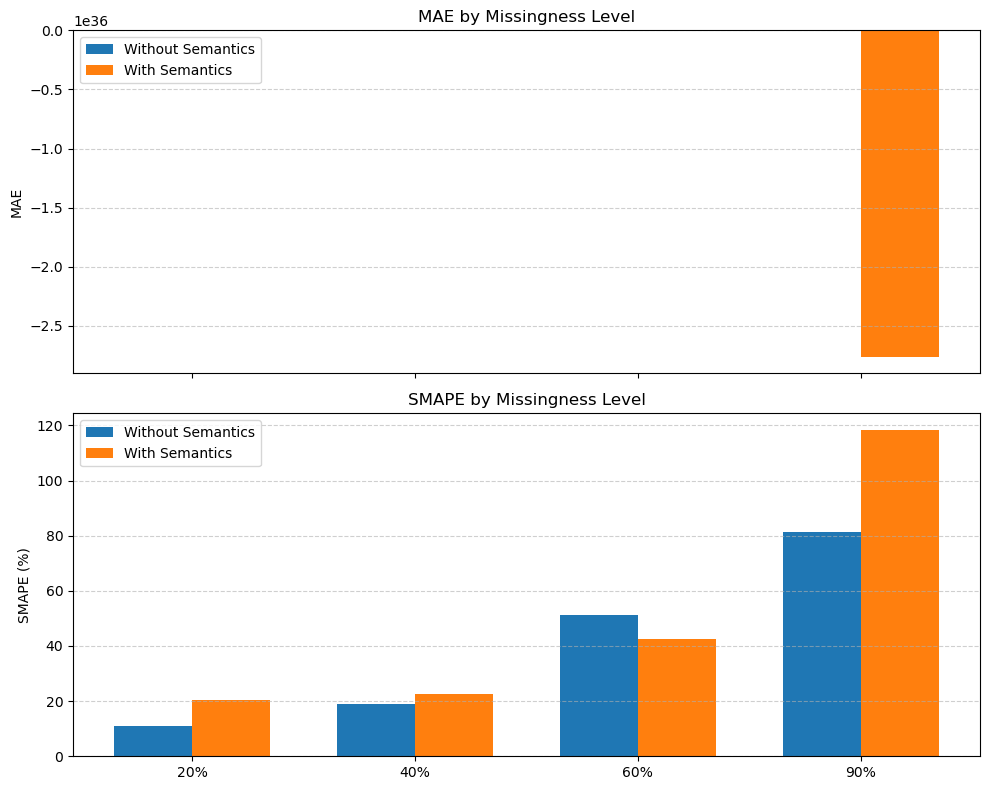

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Example error values (replace with your real variables)
missing_levels = ['20%', '40%', '60%', '90%']

# Bar chart setup
x = np.arange(len(missing_levels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- MAE plot ---
ax[0].bar(x - width/2, r2_all.values(), width, label='Without Semantics', color='tab:blue')
ax[0].bar(x + width/2, avg_r2_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE by Missingness Level')
ax[0].legend()
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# --- SMAPE plot ---
ax[1].bar(x - width/2, smape_all.values(), width, label='Without Semantics', color='tab:blue')
ax[1].bar(x + width/2, avg_smape_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[1].set_ylabel('SMAPE (%)')
ax[1].set_title('SMAPE by Missingness Level')
ax[1].set_xticks(x)
ax[1].set_xticklabels(missing_levels)
ax[1].legend()
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()


With MNAR, mean imputation works much worse, around 40% SMAPE. On the other hand, BRITS with all features, and MNAR on 80% of values missingness on 30% of columns with values deviated from 70% of mean, performs 22% SMAPE.
When using only semantically relevant features with same percentage as above, SMAPE is 21% so almost no improvement. It seems that best improvements, in general, come when percentage of missing data is very big, which makes other features more important thus their relevance increases.

With 100% missingness of values above 0.5 treshold (so real 50% MNAR missingness in 30% of columns), SMAPE for average is  62%. 
For BRITS with all features, it is 26,62%.
For average imputation with semantically relevant features 51%, for BRITS with semantically relevant features, it is 11,21%. AMAZING IMPROVEMENT

## probar con otro modelo mas sencillo, mirar ultima celda distance